In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotx
from markdownTable import markdownTable

In [138]:
def get_df(mode="encoding"):
    filename = f"{mode}.dat"
    with open(filename, "r") as file:
        output = file.read()
    data = [line.split() for line in output.splitlines() if line]
    df = pd.DataFrame(data[1:], columns=data[0])
    df[["num_ops",  "ns_per_op", "ns_per_byte"]] = df[
        ["num_ops",  "ns_per_op", "ns_per_byte"]
    ].apply(pd.to_numeric)
    return df


def process_df(df):
    # Pivot the DataFrame
    df_pivot = df.pivot_table(index=['num_bytes', 'num_ops'], columns='name', values=['ns_per_op'])

    # Flatten the multi-level column index and rename columns
    df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
    df_pivot.reset_index(inplace=True)

    return df_pivot

encoding = get_df("encoding")
decoding = get_df("decoding")
encoding_main = get_df("encoding-main")


In [139]:
enc = process_df(encoding)
dec = process_df(decoding)

# write to md files with dropping the index
enc.to_markdown("encoding.md", index=False)
dec.to_markdown("decoding.md", index=False)

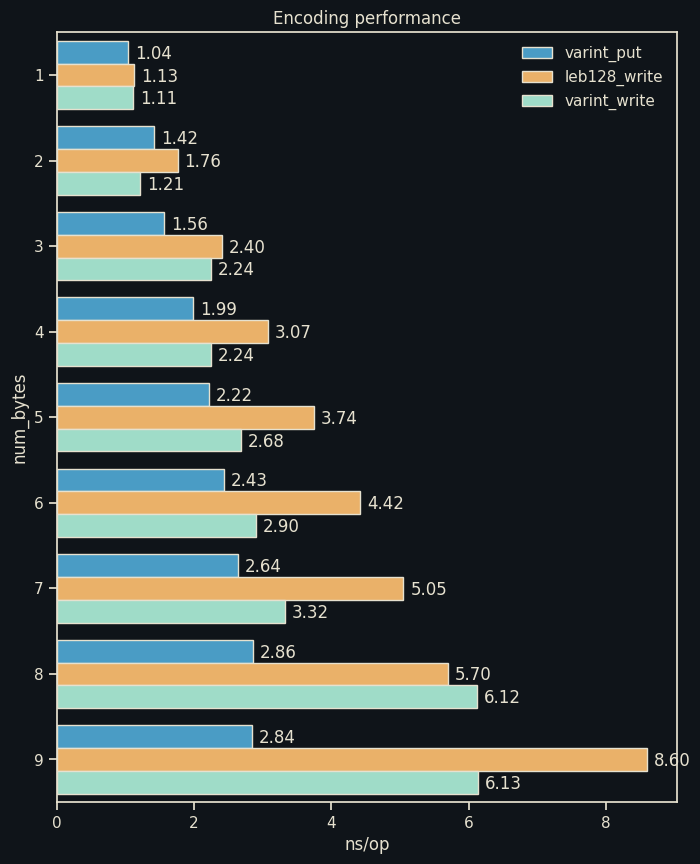

In [140]:
# set theme using matplotx
plt.style.use(matplotx.styles.ayu['dark'])
# set size
plt.figure(figsize=(8, 10))
g = sns.barplot(
    data=encoding,
    y="num_bytes",
    x="ns_per_op",
    hue="name",
)


# set titles and axis labels
plt.title("Encoding performance")
plt.xlabel("ns/op")
plt.ylabel("num_bytes")

# set legend
plt.legend(loc="upper right")

# add text to bars
for p in g.patches:
    g.annotate(
        format(p.get_width(), '.2f'),
        (p.get_width(), p.get_y() + p.get_height() / 2.),
        ha='left',
        va='center',
        xytext=(5, -1),
        textcoords='offset points'
    )

# save to encoding.png
plt.savefig("encoding.png")

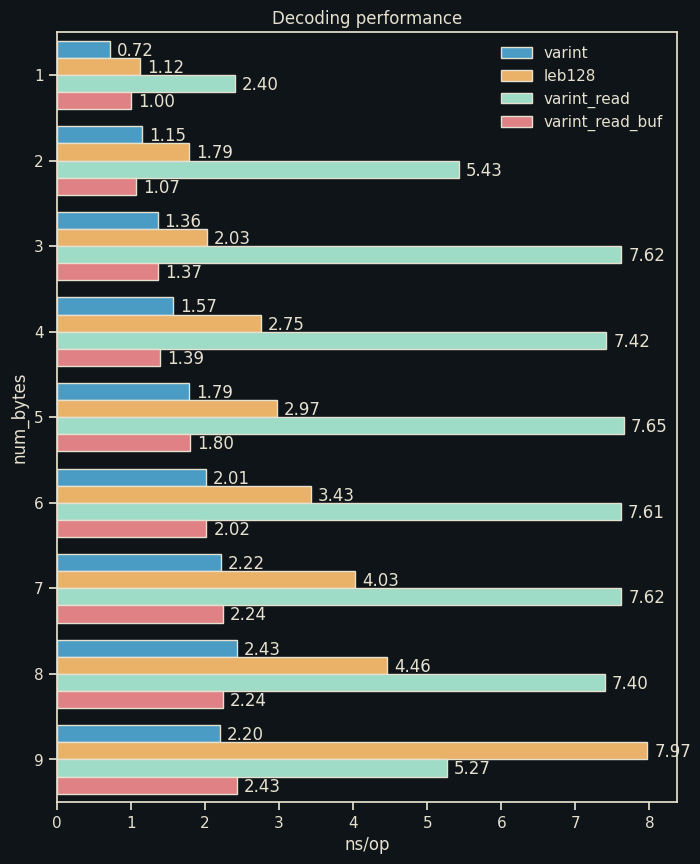

In [141]:
# set theme using matplotx
plt.style.use(matplotx.styles.ayu['dark'])
# set size
plt.figure(figsize=(8, 10))
g = sns.barplot(
    data=decoding,
    y="num_bytes",
    x="ns_per_op",
    hue="name",
)


# set titles and axis labels
plt.title("Decoding performance")
plt.xlabel("ns/op")
plt.ylabel("num_bytes")

# set legend
plt.legend(loc="upper right")

# add text to bars
for p in g.patches:
    g.annotate(
        format(p.get_width(), '.2f'),
        (p.get_width(), p.get_y() + p.get_height() / 2.),
        ha='left',
        va='center',
        xytext=(5, -1),
        textcoords='offset points'
    )

# save to encoding.png
plt.savefig("decoding.png")

In [111]:
# make a new df comparing encoding_main to encoding where name='varint_write'
encoding_main = encoding_main[encoding_main.name == "varint_write"]
encoding = encoding[encoding.name == "varint_write"]
encoding_main = encoding_main[["num_bytes", "ns_per_op"]]
encoding_main.columns = ["num_bytes", "ns_per_op_main"]
encoding = encoding[["num_bytes", "ns_per_op"]]
encoding.columns = ["num_bytes", "ns_per_op"]
encoding = encoding.merge(encoding_main, on="num_bytes")
# add percent faster column
encoding["speedup"] = encoding.ns_per_op_main / encoding.ns_per_op
encoding

,num_bytes,ns_per_op,ns_per_op_main,speedup
0,1,1.11,3.29,2.963964
1,2,1.21,3.15,2.603306
2,3,2.24,3.58,1.598214
3,4,2.24,3.57,1.593750
4,5,2.68,3.99,1.488806
5,6,2.90,4.21,1.451724
6,7,3.32,4.21,1.268072
7,8,6.12,4.65,0.759804
8,9,6.13,5.05,0.823817


In [112]:
table = markdownTable(encoding.to_dict("records"))
table.setParams(row_sep="markdown")
# write table to file
with open("table.md", "w") as file:
    file.write(table.getMarkdown())